In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/flights.csv')

In [3]:
data.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [5]:
data.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


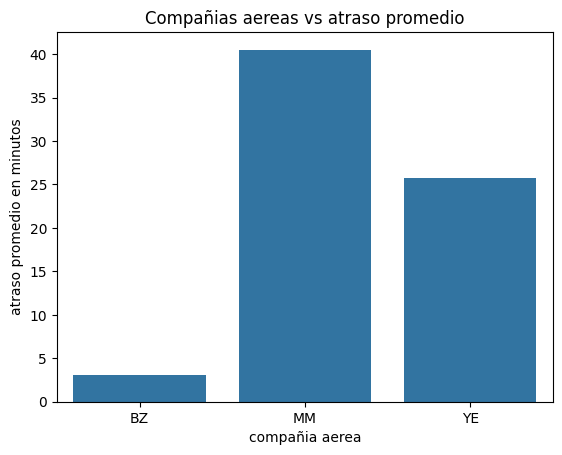

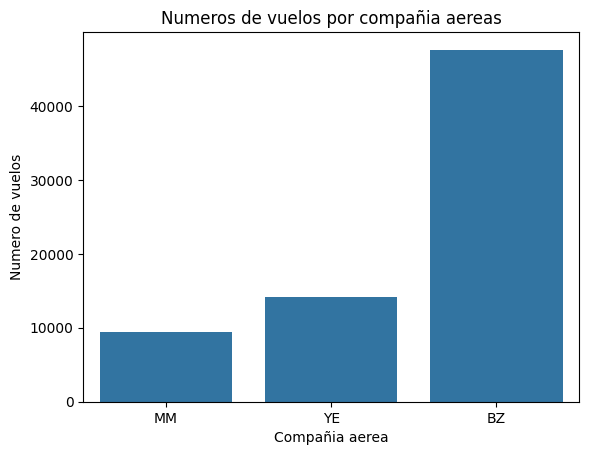

In [7]:
avg_delay = data.groupby('airline')['delay'].mean().reset_index()

sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañias aereas vs atraso promedio')
plt.xlabel('compañia aerea')
plt.ylabel('atraso promedio en minutos')
plt.show()

sns.countplot(data=data, x='airline')
plt.title('Numeros de vuelos por compañia aereas')
plt.xlabel('Compañia aerea')
plt.ylabel('Numero de vuelos')
plt.show()

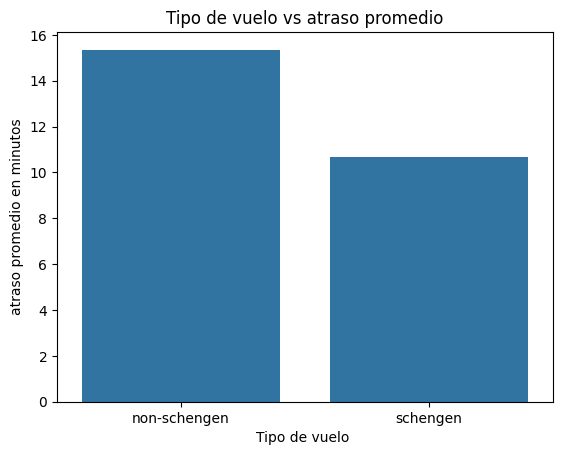

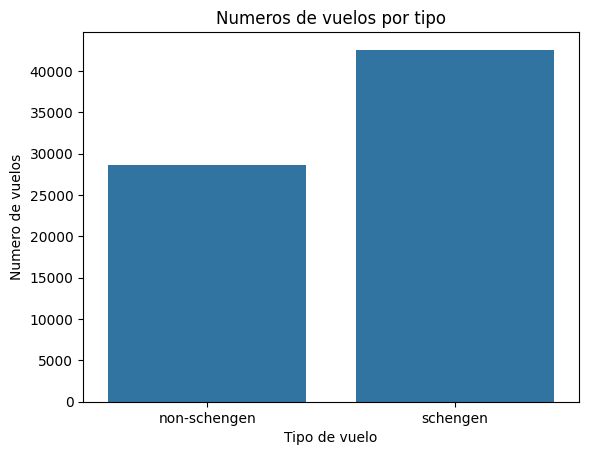

In [8]:
avg_delay = data.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo ')
plt.ylabel('atraso promedio en minutos')
plt.show()

sns.countplot(data=data, x='schengen')
plt.title('Numeros de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Numero de vuelos')
plt.show()

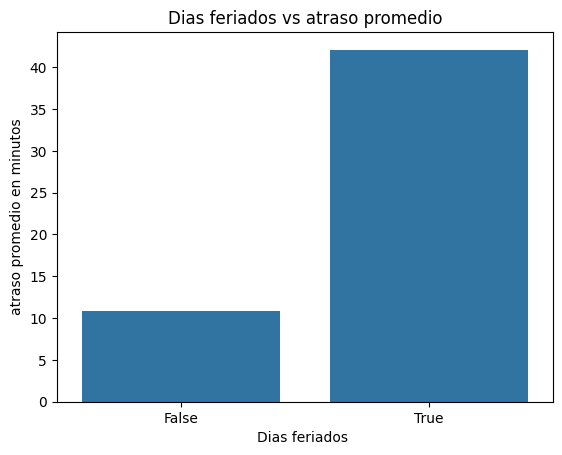

In [9]:
avg_delay = data.groupby('is_holiday')['delay'].mean().reset_index()

sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias feriados vs atraso promedio')
plt.xlabel('Dias feriados ')
plt.ylabel('atraso promedio en minutos')
plt.show()

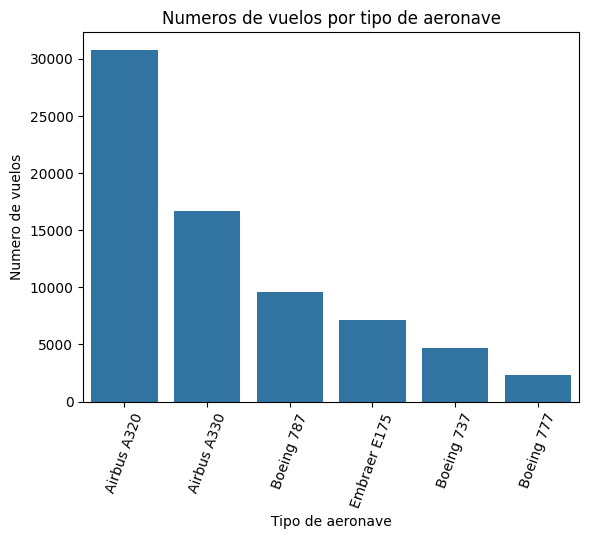

In [10]:
order = data['aircraft_type'].value_counts().index

sns.countplot(data=data, x='aircraft_type', order=order)
plt.title('Numeros de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Numero de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

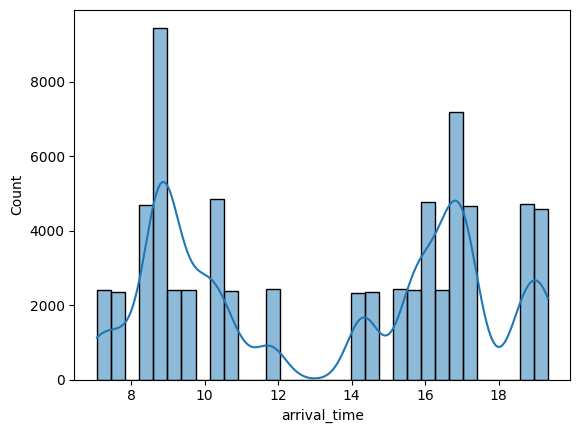

In [11]:
sns.histplot(data=data, x='arrival_time', kde=True)

In [12]:
import numpy as np

def ancho_bin(df, columna):
  q75, q25 = np.percentile(df[columna],[75,25])
  iqr = q75 - q25

  ancho = 2 * iqr * np.power(len(df[columna]),-1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

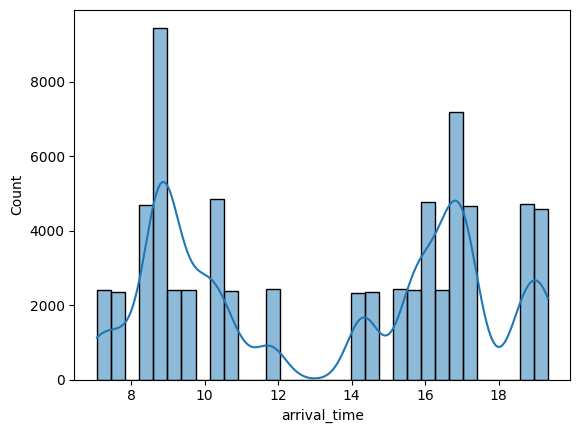

In [13]:
binwidth = ancho_bin(data, 'arrival_time')
sns.histplot(data=data, x='arrival_time', kde=True, binwidth=binwidth)

<Axes: xlabel='departure_time', ylabel='Count'>

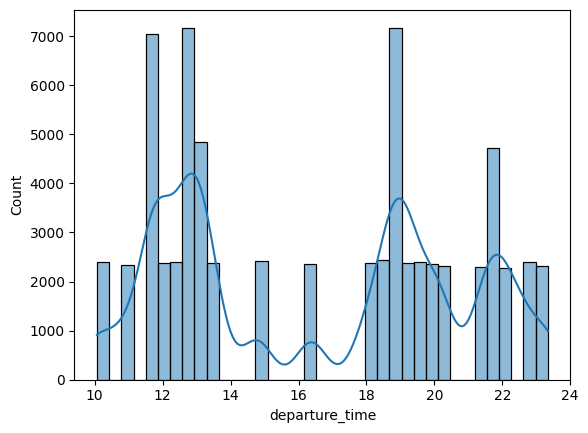

In [14]:
binwidth = ancho_bin(data, 'departure_time')
sns.histplot(data=data, x='departure_time', kde=True, binwidth=binwidth)

In [15]:
atraso_promedio = data['delay'].mean()
atraso_mediana = data['delay'].median()

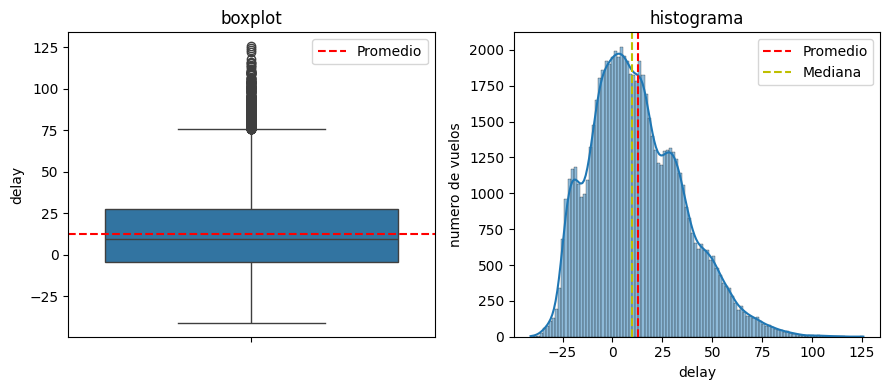

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))

sns.boxplot(data=data, y='delay', ax=ax[0])
ax[0].set_title('boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle = '--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(data, 'delay')
sns.histplot(data=data, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('numero de vuelos')
plt.grid(False)
ax[1].set_title('histograma')
ax[1].axvline(x=atraso_promedio, color='r',linestyle = '--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle = '--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

In [17]:
data.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [22]:
data['date'] = data['year'].astype(str) + '-' + (data['day']+1).astype(str)
data['date'] = pd.to_datetime(data['date'], format='%Y-%j')
data.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [25]:
data['is_weekend'] = data['date'].dt.weekday.isin([5,6])
data['day_name'] = data['date'].dt.day_name()
data.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
52206,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,195,2019,False,37.210299,2019-07-15,False,Monday
16088,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,342,2012,False,21.430729,2012-12-08,True,Saturday
23699,12,YE,Airbus A330,schengen,TZF,17.313731,21.313731,119,2014,False,34.937023,2014-04-30,False,Wednesday
35074,8,BZ,Airbus A320,schengen,ZQO,15.729617,18.729617,148,2016,False,-0.991973,2016-05-28,True,Saturday
18910,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,165,2013,False,-7.972091,2013-06-15,True,Saturday


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [28]:
import warnings

warnings.filterwarnings('ignore')

In [29]:
data['schengen'] = data['schengen'].replace({'non-schengen':0, 'schengen':1})

data['is_holiday'] = data['is_holiday'].replace({False:0, True:1})

data['is_weekend'] = data['is_weekend'].replace({False:0, True:1})

data.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
6246,27,BZ,Airbus A320,1,AUZ,14.376052,16.376052,51,2011,0,-7.319256,2011-02-21,0,Monday
34439,6,YE,Boeing 787,1,AUZ,17.033688,19.033688,105,2016,0,23.367427,2016-04-15,0,Friday
8016,21,BZ,Boeing 737,1,FJB,7.065594,10.065594,169,2011,0,11.431939,2011-06-19,1,Sunday


In [32]:
categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

pd.get_dummies(data=data, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [34]:
datos_codificados = pd.get_dummies(data=data, columns=categoricas, dtype=int)

datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
31334,20,1,16.909690,18.909690,263,2015,0,16.374526,2015-09-21,0,...,0,0,0,0,1,0,0,0,0,0
63350,4,1,11.781391,14.781391,208,2021,0,-23.001972,2021-07-28,0,...,1,0,0,0,0,0,0,0,0,1
36860,20,1,16.909690,18.909690,267,2016,0,36.001857,2016-09-24,1,...,0,0,0,0,0,1,0,0,0,0
56371,18,1,14.258911,20.258911,108,2020,0,-11.064023,2020-04-18,1,...,0,1,0,0,0,1,0,0,0,0
51929,23,1,18.801235,21.801235,176,2019,0,19.146519,2019-06-26,0,...,1,0,0,0,0,0,0,0,0,1


In [36]:
data[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [37]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [38]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time', 'day', 'year', 'date'])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
62440,0,16.571894,0,17.513352,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
66763,1,11.781391,0,-3.577077,1,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
58128,0,8.885071,0,28.207447,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
27015,0,16.571894,0,-11.262326,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
28851,0,16.571894,0,8.262084,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3577,0,10.733469,0,6.538250,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
55015,0,16.571894,0,-3.690457,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
60363,1,16.245220,0,31.454006,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
32355,0,10.177197,0,11.068379,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6221,1,16.909690,0,29.019118,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split


X = df.drop(['delay'], axis=1)

y = df['delay']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred_dummy = baseline.predict(X_test)


def calcular_regresion(y_test, y_pred):

    rmse =  mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'RMSE' : round(rmse,4),
        'MAE' : round(mae,4),
        'R2' : round(r2, 4),
        }
    return metricas

In [48]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [49]:
from sklearn.ensemble import RandomForestRegressor


modelo = RandomForestRegressor(max_depth=5, random_state=42)

modelo.fit(X_train, y_train)

ypred = modelo.predict(X_test)

resultados_rf = calcular_regresion(y_test, ypred)

resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

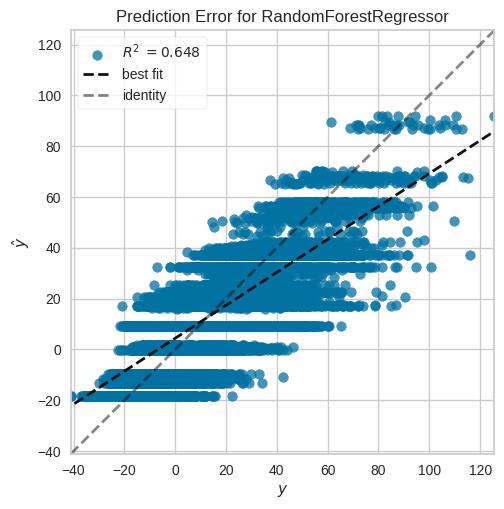

In [50]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test)

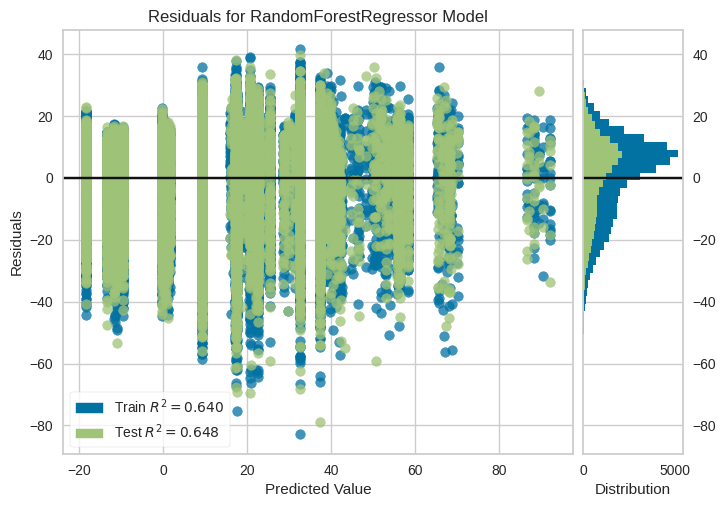

In [54]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test)

In [73]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE' : 'neg_root_mean_squared_error',
    'MAE' : 'neg_mean_absolute_error',
    'R2': 'r2'
    }

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)

cv_results

{'fit_time': array([2.43355107, 2.48977232, 2.47731829, 4.02588964, 2.45889616]),
 'score_time': array([0.04958797, 0.04920363, 0.04752254, 0.04429579, 0.04620385]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

In [74]:
len(df.columns)

31

In [75]:
importances = modelo.feature_importances_

In [76]:
feature_importances = pd.DataFrame({'Feature':X.columns, 'importances':(importances*100).round(2)}).sort_values('importances', ascending=False)
feature_importances

,Feature,importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [80]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_feature = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5) ]


for i in ct_features:
  selected_features = feature_importances['Feature'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_feature.fit(X_train_sel, y_train)
  model_feature.predict(X_test_sel)
  metricas = calcular_regresion(y_test, ypred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,13.7479,13.7479,13.7479,13.7479,13.7479,13.7479,13.7479
MAE,11.0262,11.0262,11.0262,11.0262,11.0262,11.0262,11.0262
R2,0.6477,0.6477,0.6477,0.6477,0.6477,0.6477,0.6477


In [81]:
resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_feature = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(10,15)


for i in ct_features:
  selected_features = feature_importances['Feature'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_feature.fit(X_train_sel, y_train)
  model_feature.predict(X_test_sel)
  metricas = calcular_regresion(y_test, ypred)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14
RMSE,13.7479,13.7479,13.7479,13.7479,13.7479
MAE,11.0262,11.0262,11.0262,11.0262,11.0262
R2,0.6477,0.6477,0.6477,0.6477,0.6477


In [82]:
selected_features = feature_importances['Feature'].values[:13]
X_selected_features = X[selected_features]

X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

In [84]:
param_grid = {
    'max_depth' : [5,10,15],
    'min_samples_leaf': [1,2,3],
    'min_samples_split' : [2,4,6],
    'n_estimators' : [100,150,200]
}

In [88]:
from sklearn.model_selection import GridSearchCV, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2',
                          cv=cv)

model_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [90]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [91]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test,y_pred_grid)

metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [92]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,modelo_grid
RMSE,13.7479,13.7479,13.7479,13.7479,13.7479,13.2308
MAE,11.0262,11.0262,11.0262,11.0262,11.0262,10.6296
R2,0.6477,0.6477,0.6477,0.6477,0.6477,0.6754


In [97]:
import pickle

try:
  with open('champion_flights.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo serializado con exito')
except Exception as e:
  print('Se presento un error al almacenar el modelo', str(e))

Modelo serializado con exito
